# Decision Making in Business

**Project Goal**: Prioritize hypotheses to maximize key metrics, analyze A/B test results, state conclusions and recommendations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats as stats
from IPython.display import display
import pylab as pl
from datetime import datetime, timedelta
pd.set_option('display.max_colwidth', None)

## Hypotheses prioritization

### Data Processing and Exploration

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### RICE

In [4]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
rice_hypothesis = (hypothesis[['hypothesis','RICE']]).sort_values(by='RICE', ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
rice_hypothesis.style.background_gradient(cmap=cm)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


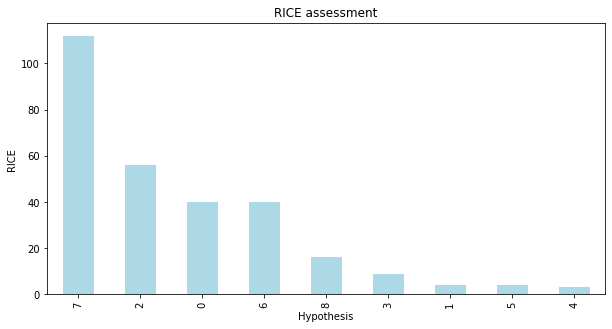

In [5]:
rice_hypothesis.plot(y='RICE', kind='bar', figsize=(10, 5), xlabel="Hypothesis", ylabel="RICE", color="lightblue", title="RICE assessment", legend=False);

Hypothesis #7 has the highest RICE assessment, thus it should be the one to test.

## A/B test analysis

### Data Processing and Exploration

#### Orders

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
print('Duplicated lines detected  -', orders.duplicated().sum())
print('Duplicated orders detected -',orders['transaction_id'].duplicated().sum())

Duplicated lines detected  - 0
Duplicated orders detected - 0


In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
print('Timeframe', min(orders['date']), '-', max(orders['date']))

Timeframe 2019-08-01 00:00:00 - 2019-08-31 00:00:00


#### Visitors

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
print('Duplicated lines detected -', visitors.duplicated().sum())
visitors_duplicates = visitors[visitors.duplicated(['date', 'group'])]
print('Duplicated data detected -', visitors_duplicates.shape[0])

Duplicated lines detected - 0
Duplicated data detected - 0


In [18]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [19]:
print('Timframe', min(visitors['date']), '-', max(visitors['date']))

Timframe 2019-08-01 00:00:00 - 2019-08-31 00:00:00


#### Grouping validation

In [20]:
number_users = orders.groupby('group')['visitor_id'].nunique().reset_index()
number_users.columns = ['Group', 'Number of users']
number_users

,Group,Number of users
0,A,503
1,B,586


In [21]:
orders_a = orders.query('group=="A"')
print('Number of unique users in Group A :', orders_a['visitor_id'].nunique())
orders_a_visitors = orders_a['visitor_id'].unique ()

Number of unique users in Group A : 503


In [22]:
orders_b = orders.query('group=="B"')
print('Number of unique users in Group B:', orders_b['visitor_id'].nunique())
orders_b_visitors = orders_b['visitor_id'].unique ()

Number of unique users in Group B: 586


In [23]:
intersection_visitors = list(set(orders_a_visitors).intersection(orders_b_visitors))
print('Number of users detected either in group A and in Group B:', len(intersection_visitors))

Number of users detected either in group A and in Group B: 58


In [24]:
orders_new = orders[orders.visitor_id.isin(intersection_visitors) == False]
orders_new.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


In [25]:
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### Сumulative Revenue by groups

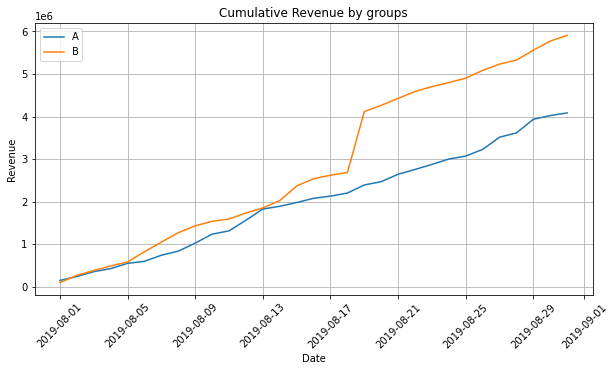

In [26]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
.agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] \
                                       .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.title('Сumulative Revenue by groups')
plt.legend();

### Сumulative Average check by groups

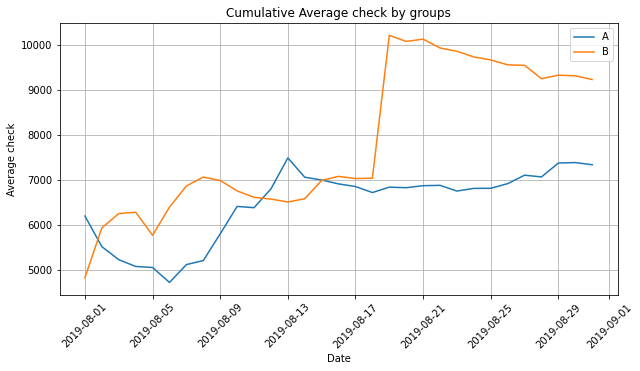

In [27]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Average check')
plt.xlabel('Date')
plt.title('Сumulative Average check by groups')
plt.legend();

### Сumulative Average check Relative variation

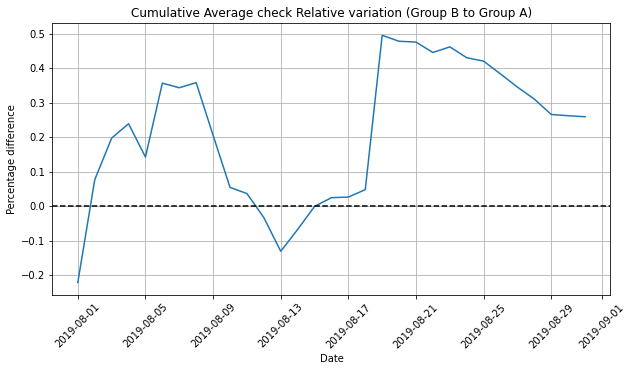

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Percentage difference')
plt.xlabel('Date')
plt.title('Сumulative Average check Relative variation (Group B to Group A)');

### Сumulative Average orders number per user by groups

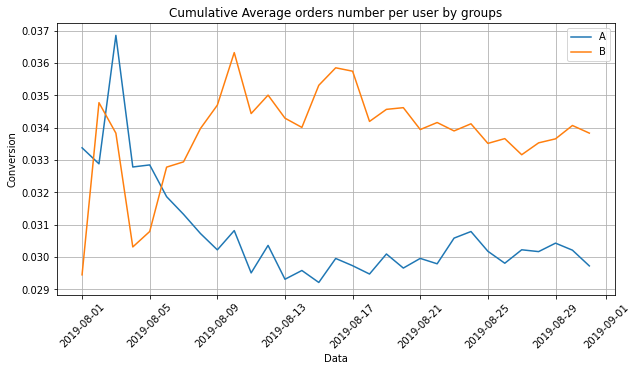

In [29]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Conversion')
plt.xlabel('Data')
plt.title('Сumulative Average orders number per user by groups')
plt.legend();

### Сumulative average orders number per user Relative variation

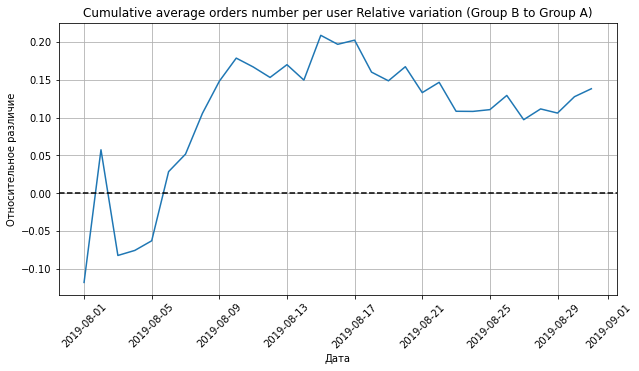

In [30]:
# Объединим данные
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date',
                                                                            right_on='date', how='left', suffixes=['A', 'B'])

# Построим график
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] /
         mergedCumulativeConversions['conversionA']-1)
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Относительное различие')
plt.xlabel('Дата')
plt.title('Сumulative average orders number per user Relative variation (Group B to Group A)');

### Number of Orders

In [31]:
ordersByUsers = (orders_new.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers_sorted = ordersByUsers.sort_values(by='orders', ascending=False)

ordersByUsers_sorted.head(5)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


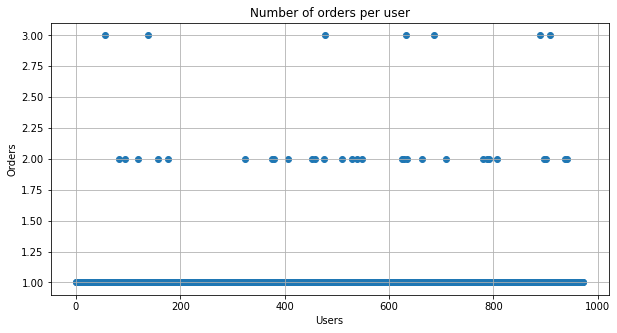

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Orders')
plt.xlabel('Users')
plt.title('Number of orders per user');

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


### Orders amount

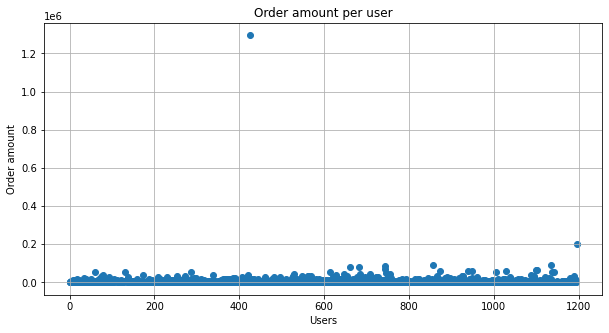

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.grid()
plt.ylabel('Order amount')
plt.xlabel('Users')
plt.title('Order amount per user')
plt.scatter(x_values, orders['revenue'])
plt.show()

In [35]:
print(np.percentile(orders_new['revenue'], [95, 99]))

[26785. 53904.]


## Statistical hypotheses testing¶

### Statistical significance of differences in Average orders number per user by groups (for row data)

*Н0:* There are no statistically significant differences in Average orders number per user by groups (for row data)

*Н1:* The differences in Average orders number per user by groups (for row data) are statistically significant 

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative difference= {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.01679
Relative difference= 0.138


**Вывод:**

- Относительное различие между группами - 13,8%.
- P-value меньше 0,05, соответственно нулевую гипотезу следует отвергнуть, то есть различия в среднем количестве заказов на посетителя между группами по «сырым» данным статистически значимы.


### Statistical significance of differences in Average check by groups (for row data)

*Н0:* There are no statistically significant differences in Average check by groups (for row data)

*Н1:* The differences in in Average check by groups (for row data) are statistically significant 

In [37]:
print("p-value = {0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1]))

print("Relative difference= {0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Relative difference= 0.259


### Statistical significance of differences in Average orders number per user by groups (for cleared data)

*Н0:* There are no statistically significant differences in Average orders number per user by groups (for cleared data)

*Н1:* The differences in Average orders number per user by groups (for cleared data) are statistically significant 

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'],99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'],99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders_new['revenue'],99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative difference= {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))



p-value = 0.010
Relative difference= 0.174


### Statistical significance of differences in Average check by groups (for cleared data)

*Н0:* There are no statistically significant differences in Average check by groups (for cleared data)

*Н1:* The differences in in Average check by groups (for cleared data) are statistically significant 

In [39]:
print(
    "p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Relative difference= {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.798
Relative difference= -0.020


## Conclusion

1) Data is processed and explored;\
2) 9 Hypotheses assessed with RICE framework. Hypothesis # 7 is considered as the one that should be tested.\
3) Metrix analysed:
   - Сumulative Revenue by groups:\
   Revenue increases all over the testing timeframe. For group B the jump around 18th August is detected, reasons for this need to be further analysed.
   
   
   - Сumulative Average check by groups:\
   Average Check for Group A increases at the beginning of the timeframe, then shows steady growth and stabilizes by the end of the timeframe. Average Check for Group B shows the intermittent growth with significant jump around 18th August, then modulates and relatively stabilizes.
   
   
   - Сumulative Average check Relative variation:\
   Сumulative Average check for Group B generally is higher than for Group A. The jump on 18th august is also visible.
   
   
   - Сumulative Average orders number per user by groups:\
    Plot is close to symmetrical. After 6th August Conversion for Group A seems to be always lower than for Group B. Conversion for Group B shows variations that seem to significantly decrease by the end of the timeframe.
    
   
   - Сumulative average orders number per user Relative variation:\
   In the beginning of the timeframe Group B loses out to Group A, but takes the lead around 6th August. After 25th August Conversion for Group B stabilizes and shows only insignificant variations within 10-15%.
   
   
   - Number of Orders:\
   The majority of usres placed just 1 order, there are some useres that placed 2-5 orders, and 3 users that placed 8,9 & 11 orders each.
   
   
   - Orders amount:\
   2 Potentially abnormal values detected: 200000 & 1250000. Orders like that are highly unlikely even for a big web shop, and it seems like order 1250000 is responsible for the Revenue and Average check variation jump detected earlier. Rest of the orders are around the same variation limits.
   

   - Abnormal values detection and processing:
     - 95 & 99 percentiles for the number of orders are calculated. It shows that not more than 5% of users placed not more than 1 order, and not more than 1% of users placed not more than 2 orders. It is decided to acknowledge all users with more than 2 orders as abnormal values, and withdraw them.

     - 95 & 99 percentiles for the cost of orders are calculated. It shows that not more than 5% of users paid more than 26785, and not more than 1% of users paid not more than 53904 orders. It is decided to acknowledge all orders that cost  more than 53904 as abnormal values, and withdraw them.   
     
   
4) Statistical hypotheses testing results:¶   
   - The differences in Average orders number per user by groups (for row data) are statistically significant.
   - There are no statistically significant differences in Average check by groups (for row data).
   - The differences in Average orders number per user by groups (for cleared data) are statistically significant.
   - There are no statistically significant differences in Average check by groups (for cleared data).
   
**Thus it is decided to stop the test and state that Group B has won.**